# ADAML PA Week 2
## Data Summary and Visualization

In [19]:
import xarray as xr
import pandas as pd

dataset = xr.open_dataset('MiningProcess_Flotation_Plant_Database.h5', engine = 'h5netcdf')
df = dataset.to_pandas()
col_names = list( df.columns )


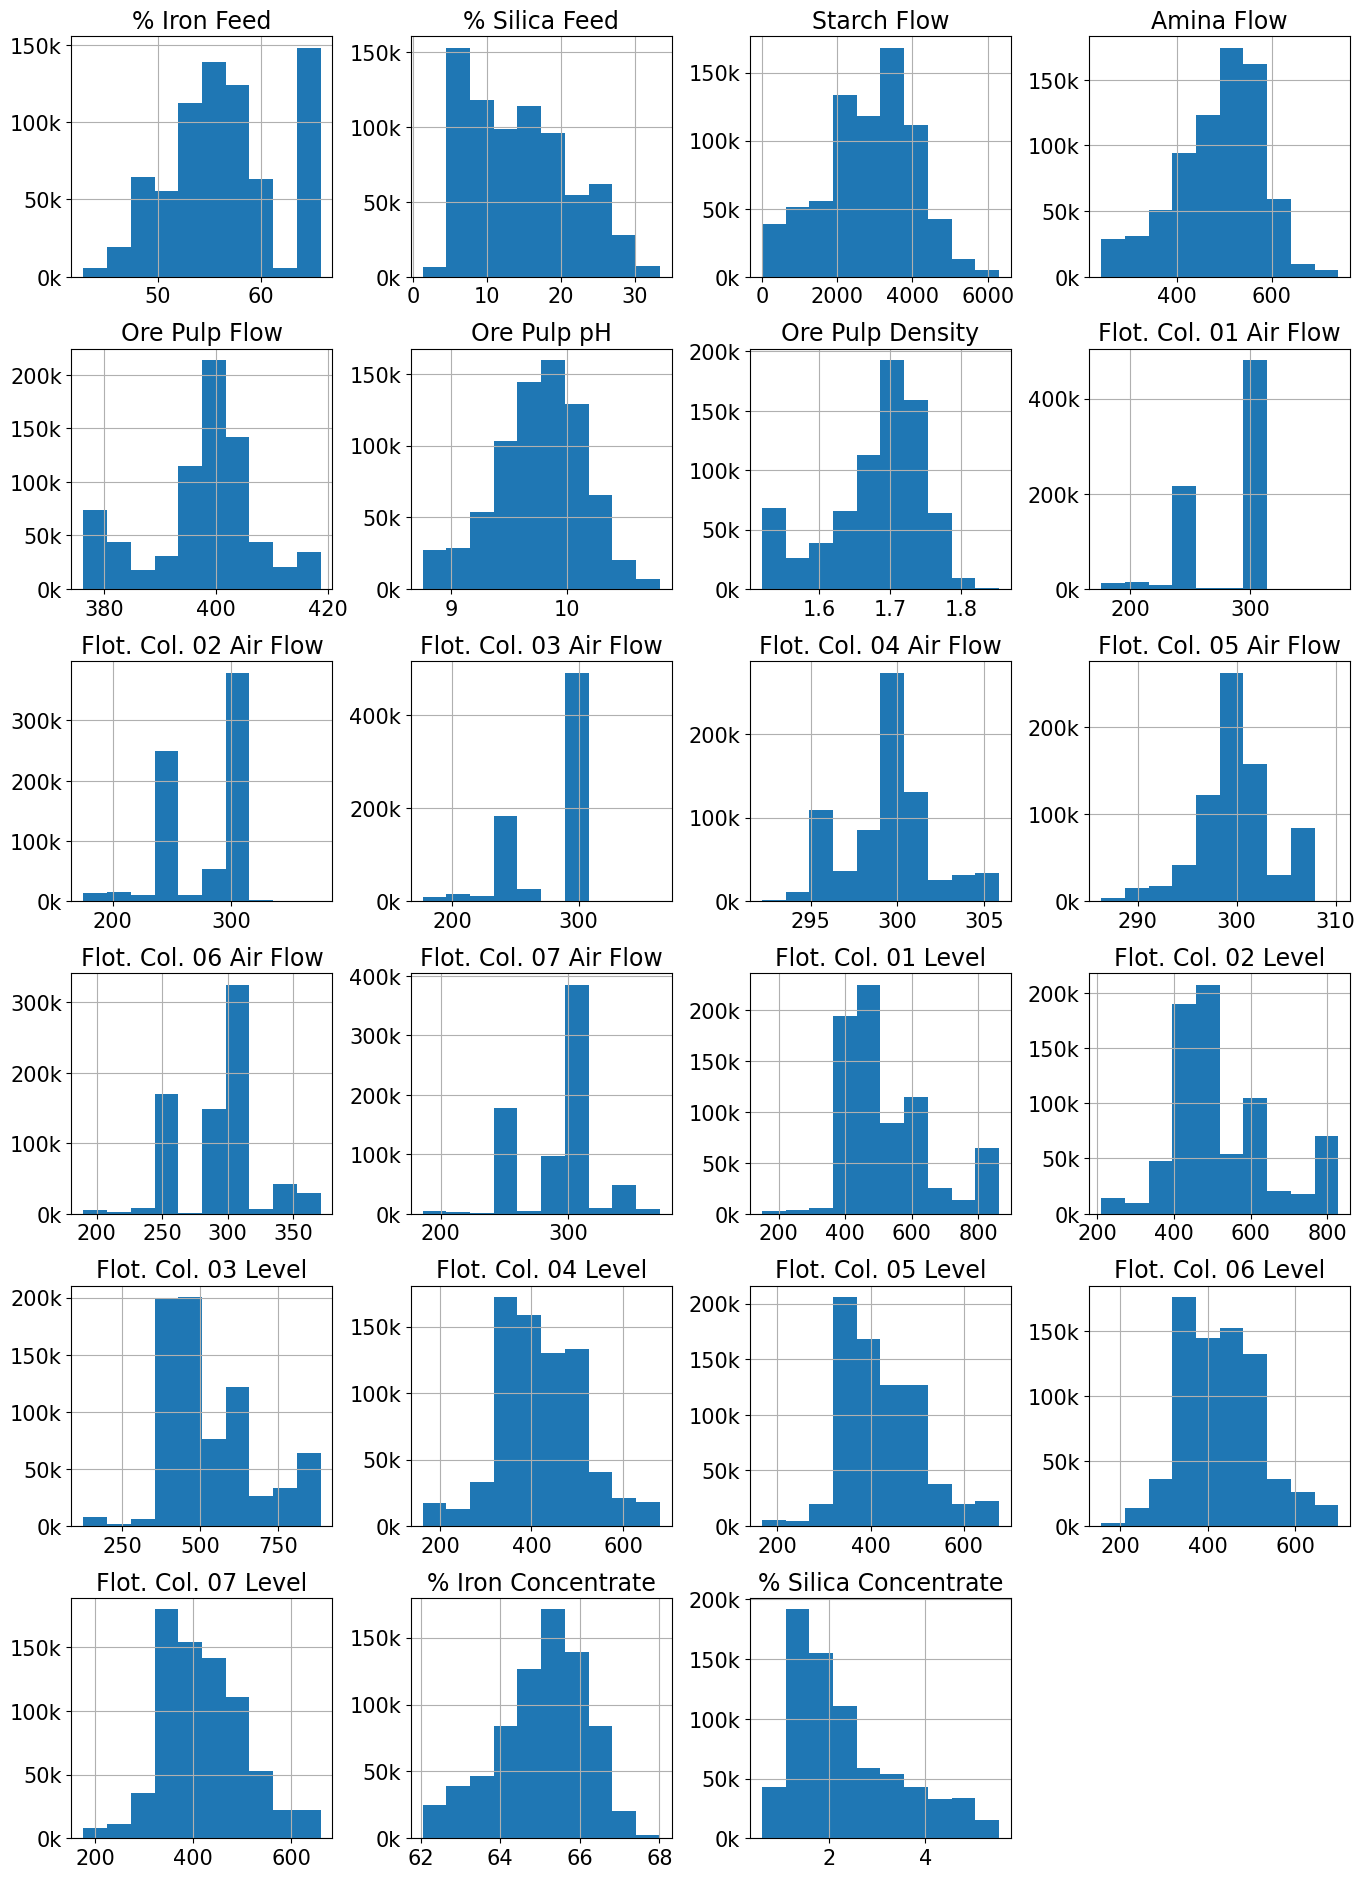

In [24]:

import matplotlib.pyplot as plt

# Saving period of discontinuity
df_discontinuity = df.loc["201703160600":"201703291200"]

# Removing period of discontinuity from the dataframe
df.loc["201703160600":"201703291200"] = pd.NA
df.dropna( inplace = True )

# Plotting histograms of the variables
figs = df.hist( figsize = (16.5, 23.4 ), layout = (6, 4) )


for ax in figs.flatten():
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    title = ax.get_title()
    title = title.replace("Flotation", "Flot.").replace("Column", "Col.")
    ax.set_title(title, fontsize=17, wrap=True)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000)) + 'k'))



ax = figs[0, 0].get_figure()
ax.savefig("hist_all_variables.pdf", bbox_inches = 'tight' )


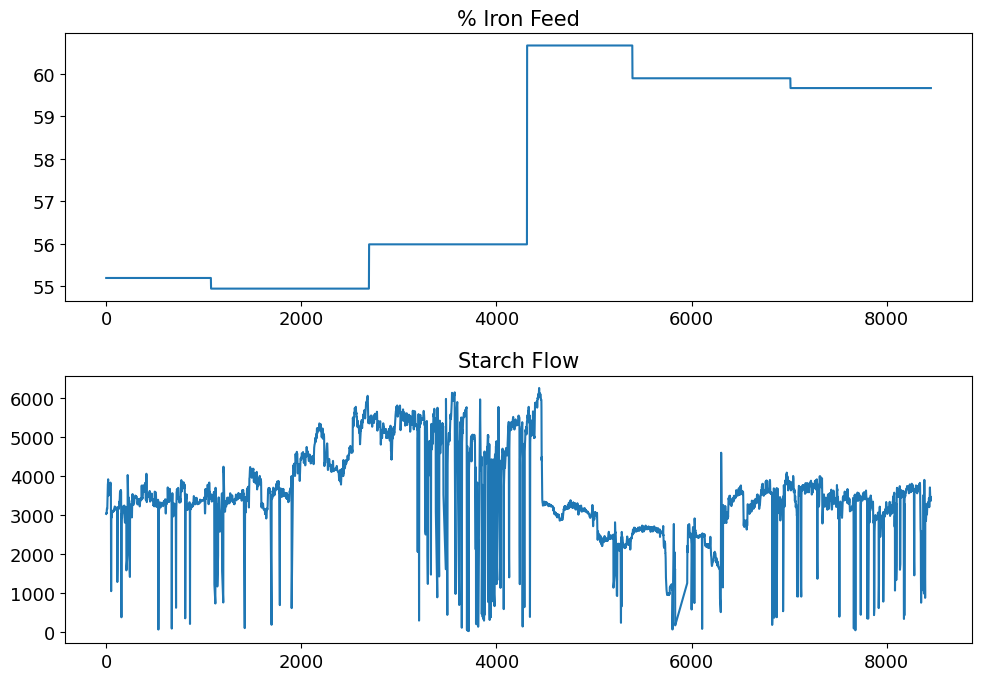

In [27]:
# 
plot_inds = range( 8455 )

fig, axs = plt.subplots(2, 1)
fig.set_size_inches(10, 7)

axs[0].plot( plot_inds, df.iloc[plot_inds,  0] )
axs[0].set_title("% Iron Feed")

axs[1].plot( plot_inds, df.iloc[plot_inds,  2] )
axs[1].set_title("Starch Flow")

fig.tight_layout()

for ax in axs:
    ax.tick_params(axis='x', labelsize=13)
    ax.tick_params(axis='y', labelsize=13)
    ax.title.set_fontsize(15)

fig.savefig( "data_examples.pdf" )